In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

# Método de Lagrange

## Problema com uma restrição de igualdade

Seja o problema de otimização restrito:

\begin{align}
    \mathbf{x^*} = \arg\min &~ f(\mathbf{x}) = 3x_1 + 4x_2 \\
    \mathrm{sujeito~a}: &~ x_1^2 + x_2^2 - 1 = 0
\end{align}

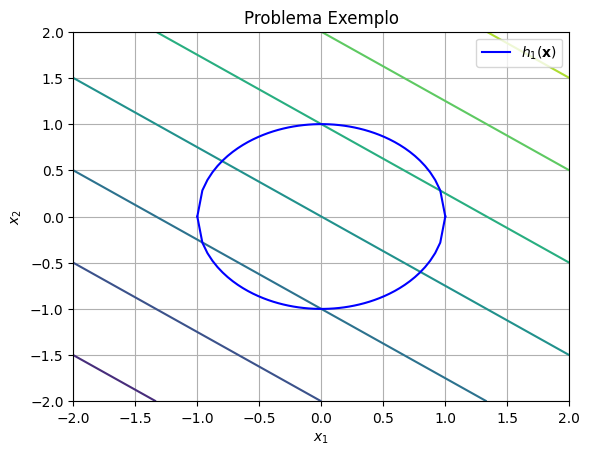

In [2]:
# Definição da malha de pontos
x1, x2 = np.meshgrid(np.linspace(-2, 2),
                     np.linspace(-2, 2))

# Calcula f(x) e exibe gráfico de contorno
f = 3*x1 + 4*x2
plt.contour(x1, x2, f)

# Calcula h1 e exibe restrição
x1 = np.linspace(-1, 1)
h1p = np.sqrt(1 - x1**2)
h1m = -np.sqrt(1 - x1**2)
plt.plot(x1, h1p, 'b', label=r'$h_1(\mathbf{x})$')
plt.plot(x1, h1m, 'b')

# Outros parâmetros da figura
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema Exemplo')
plt.legend()
plt.grid()
plt.show()

Pelas condições de KKT, a solução ótima deve atender o seguinte sistema de equações não-lineares:

\begin{align}
    3 + 2\lambda_1x_1 &=& 0 \\
    4 + 2\lambda_1x_2 &=& 0 \\
    x_1^2 + x_2^2 - 5 &=& 0
\end{align}

Logo, precisamos determinar $x_1$, $x_2$ e $\lambda_1$ que resolvam o sistema acima.

x1 = -0.60
x2 = -0.80
lambda1 = 2.50
eq1 = 0.00
eq2 = -0.00
h1 = -0.00


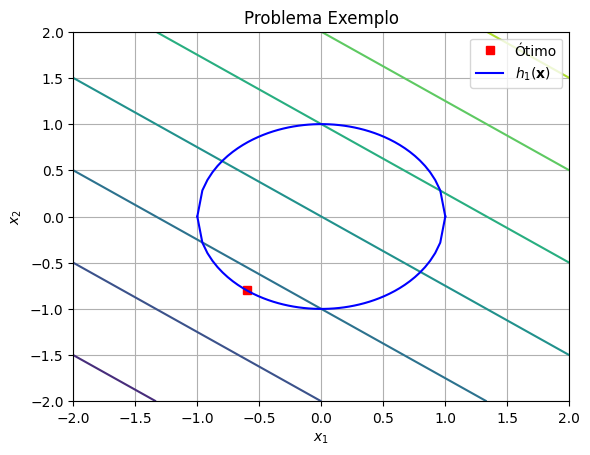

In [3]:
# Definição do sistema de equações
def system(vars):
    x1, x2 = vars[0], vars[1]
    lambda1 = vars[2]
    eq1 = 3 + 2*lambda1*x1
    eq2 = 4 + 2*lambda1*x2
    eq3 = x1**2 + x2**2 - 1
    return [eq1, eq2, eq3]

# Ponto inicial
x0 = np.array([0, 0, 1.], dtype=float)

# Executa algoritmo
x1opt, x2opt, lambda1 = optimize.fsolve(system, x0)

# Exibe resultados
print('x1 = %.2f' % x1opt)
print('x2 = %.2f' % x2opt)
print('lambda1 = %.2f' % lambda1)
print('eq1 = %.2f' % (3 + 2*lambda1*x1opt))
print('eq2 = %.2f' % (4 + 2*lambda1*x2opt))
print('h1 = %.2f' % (x1opt**2+x2opt**2-1))

# Definição da malha de pontos
x1, x2 = np.meshgrid(np.linspace(-2, 2),
                     np.linspace(-2, 2))

# Calcula f(x) e exibe gráfico de contorno
f = 3*x1 + 4*x2
plt.contour(x1, x2, f)
plt.plot(x1opt, x2opt, 'rs', label='Ótimo')

# Calcula h1 e exibe restrição
x1 = np.linspace(-1, 1)
h1p = np.sqrt(1 - x1**2)
h1m = -np.sqrt(1 - x1**2)
plt.plot(x1, h1p, 'b', label=r'$h_1(\mathbf{x})$')
plt.plot(x1, h1m, 'b')

# Outros parâmetros da figura
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema Exemplo')
plt.legend()
plt.grid()
plt.show()


## Problema com restrição de igualdade e desigualdade

Seja o problema de otimização restrito:

\begin{align}
    \mathbf{x^*} = \arg\min & f(\mathbf{x}) = (x_1-3)^2 + 2(x_2-3)^2 \\
    \mathrm{sujeito~a}: &\begin{cases} g_1(\mathbf{x}): & 3x_1 + 2x_2 \le 12 \\ h_1(\mathbf{x}): & x_1 + x_2 = 5 \\ & 0 \le x_1, x_2 \le 6 \end{cases}
\end{align}

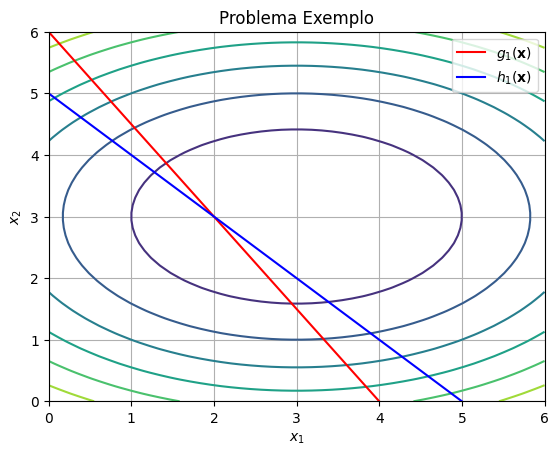

In [4]:
# Definição da malha de pontos
x1, x2 = np.meshgrid(np.linspace(0, 6),
                     np.linspace(0, 6))

# Calcula f(x) e exibe gráfico de contorno
f = (x1-3)**2 + 2*(x2-3)**2
plt.contour(x1, x2, f)

# Calcula g1 e exibe restrição
x1 = np.linspace(0, 4)
g1 = (12-3*x1)/2
plt.plot(x1, g1, 'r', label=r'$g_1(\mathbf{x})$')

# Calcula h1 e exibe restrição
x1 = np.linspace(0, 5)
h1 = 5-x1
plt.plot(x1, h1, 'b', label=r'$h_1(\mathbf{x})$')

# Outros parâmetros da figura
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Problema Exemplo')
plt.legend()
plt.grid()
plt.show()

Pelas condições de KKT, a solução ótima deve atender o seguinte sistema de equações não-lineares:

\begin{align}
    2(x_1-3) + 3\beta_1 + \lambda_1 &=& 0 \\
    4(x_2-3) + 2\beta_1 + \lambda_1 &=& 0 \\
    \beta_1(3x_1+2x_2-12) &=& 0 \\
    \beta_1 &\ge& 0 \\
    x_1 + x_2 - 5 &=& 0
\end{align}

Logo, precisamos determinar $x_1$, $x_2$, $\beta_1$ e $\lambda_1$ que resolvam o sistema acima.

In [5]:
# Definição do sistema de equações
def system(vars):
    x1, x2 = vars[0], vars[1]
    beta1, lambda1 = vars[2], vars[3]
    eq1 = 2*(x1-3) + 3*beta1 + lambda1
    eq2 = 4*(x2-3) + 2*beta1 + lambda1
    eq3 = beta1*(3*x1 + 2*x2 - 12)
    eq4 = x1 + x2 - 5
    return [eq1, eq2, eq3, eq4]

# Ponto inicial
x0 = np.array([0, 0, 1, 1], dtype=float)

# Executa algoritmo
x1, x2, beta1, lambda1 = optimize.fsolve(system, x0)

# Exibe resultados
print('x1 = %.2f' % x1)
print('x2 = %.2f' % x2)
print('beta1 = %.2f' % beta1)
print('lambda1 = %.2f' % lambda1)
print('g1 = %.2f' % (3*x1 + 2*x2))
print('h1 = %.2f' % (x1+x2))


x1 = 2.00
x2 = 3.00
beta1 = 2.00
lambda1 = -4.00
g1 = 12.00
h1 = 5.00
